# Datenanalyse und -visualisierung der Ergebnisse für RCP2.6

Zuerst werden die benötigten Bibliotheken und Daten der beiden RCP-Szenarien geladen.

In [1]:
# Bibliotheken laden
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Prognostizierte Abflussdaten unter RCP2.6 laden
df_rcp26 = pd.read_csv(
    "https://raw.githubusercontent.com/emorl/projektstudie-murgtal/main/1_daten/rcp26_flow_predicted.csv",
    parse_dates=["date"],
    dayfirst=True  
)

# Prognostizierte Abflussdaten unter RCP8.5 laden
df_rcp85 = pd.read_csv(
    "https://raw.githubusercontent.com/emorl/projektstudie-murgtal/main/1_daten/rcp85_flow_predicted.csv",
    parse_dates=["date"],
    dayfirst=True  
)

# Vergangenheitsdaten laden
df_his = pd.read_csv("https://raw.githubusercontent.com/emorl/projektstudie-murgtal/main/1_daten/era5_tas_prec_discharge_merge.csv", parse_dates=["date"])


## Überblick 

In [2]:
df_rcp26.head()

,date,t2m_mean,tp_sum,predicted_flow_m3_s
0,2006-01-04,3.088083,2.526902,15.388349
1,2006-01-05,-12.645255,32.692884,15.306069
2,2006-01-06,-14.561911,4.252166,12.114866
3,2006-01-07,-16.178610,0.034854,8.966321
4,2006-01-08,-17.078589,13.871820,9.053594


In [3]:
df_rcp26.describe()

,t2m_mean,tp_sum,predicted_flow_m3_s
count,34695.000000,34695.000000,34695.000000
mean,8.669377,4.104262,24.676877
std,7.295453,7.526222,26.700369
min,-19.128577,0.000000,3.950424
25%,3.121408,0.000000,9.650511
50%,8.721414,0.400819,15.947010
75%,14.354745,5.315207,27.939050
max,27.271402,113.222627,424.622162


In [4]:
df_rcp85.describe()

,t2m_mean,tp_sum,predicted_flow_m3_s
count,34695.000000,34695.000000,34695.000000
mean,10.017482,3.888644,23.113978
std,7.507053,7.406637,26.058385
min,-17.078589,0.000000,4.096107
25%,4.396402,0.000000,8.377367
50%,9.954752,0.278831,14.213284
75%,16.054758,4.670412,26.270904
max,27.271402,99.803916,405.797913


In [ ]:
df_rcp85.tail()

# RCP2.6 und RCP 8.5

In diesem Abschnitt wird der prognostizierter Abfluss, Temperatur und Niederschlag für beide RCPs visualisiert.

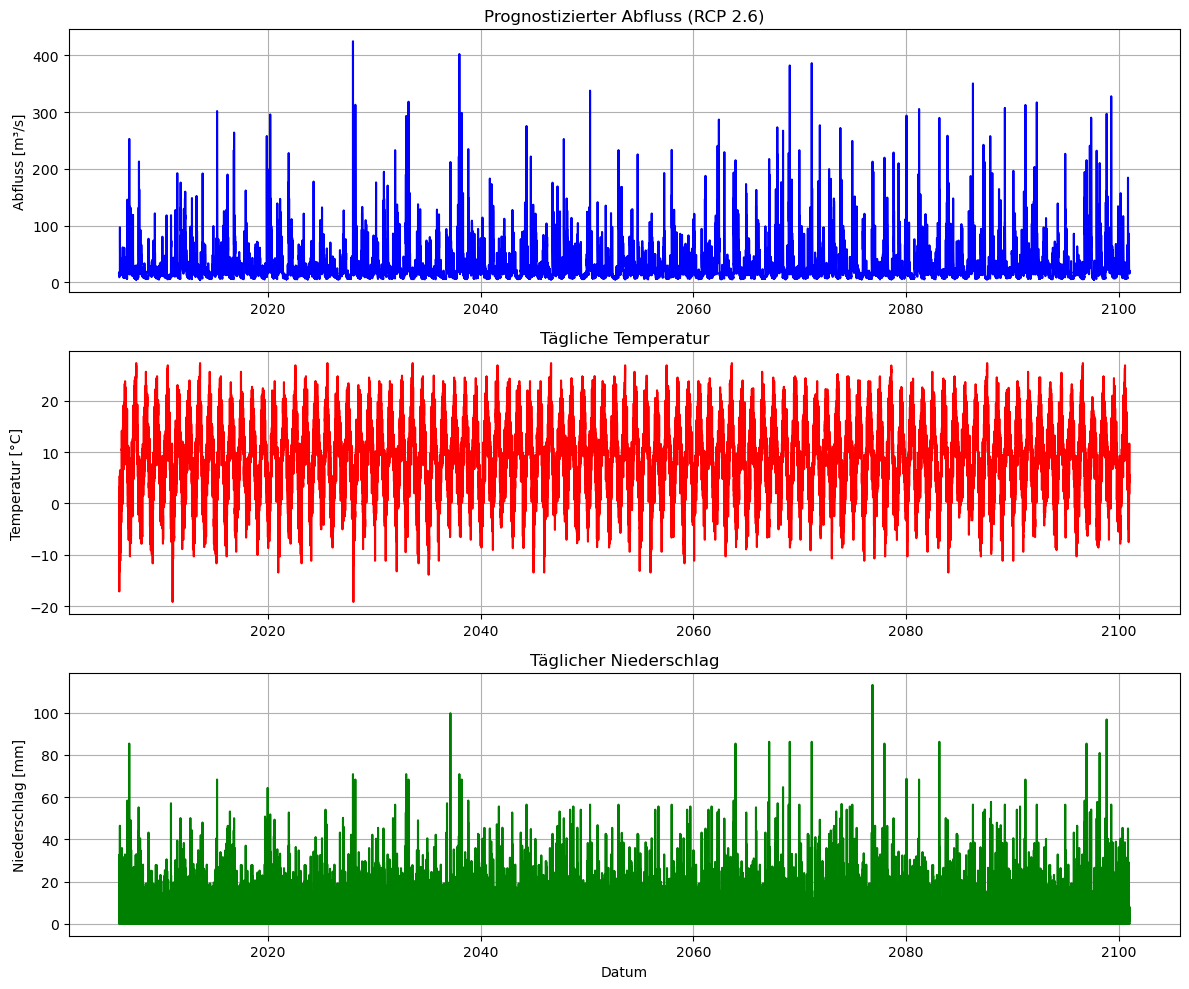

In [3]:
df_rcp26["date"] = pd.to_datetime(df_rcp26["date"], dayfirst=True)


plt.figure(figsize=(12, 10))

# Abfluss
plt.subplot(3, 1, 1)
plt.plot(df_rcp26["date"], df_rcp26["predicted_flow_m3_s"], color="blue")
plt.ylabel("Abfluss [m³/s]")
plt.title("Prognostizierter Abfluss (RCP 2.6)")
plt.grid(True)

# Temperatur
plt.subplot(3, 1, 2)
plt.plot(df_rcp26["date"], df_rcp26["t2m_mean"], color="red")
plt.ylabel("Temperatur [°C]")
plt.title("Tägliche Temperatur")
plt.grid(True)

# Niederschlag
plt.subplot(3, 1, 3)
plt.plot(df_rcp26["date"], df_rcp26["tp_sum"], color="green")
plt.ylabel("Niederschlag [mm]")
plt.title("Täglicher Niederschlag")
plt.xlabel("Datum")
plt.grid(True)

plt.tight_layout()
plt.show()


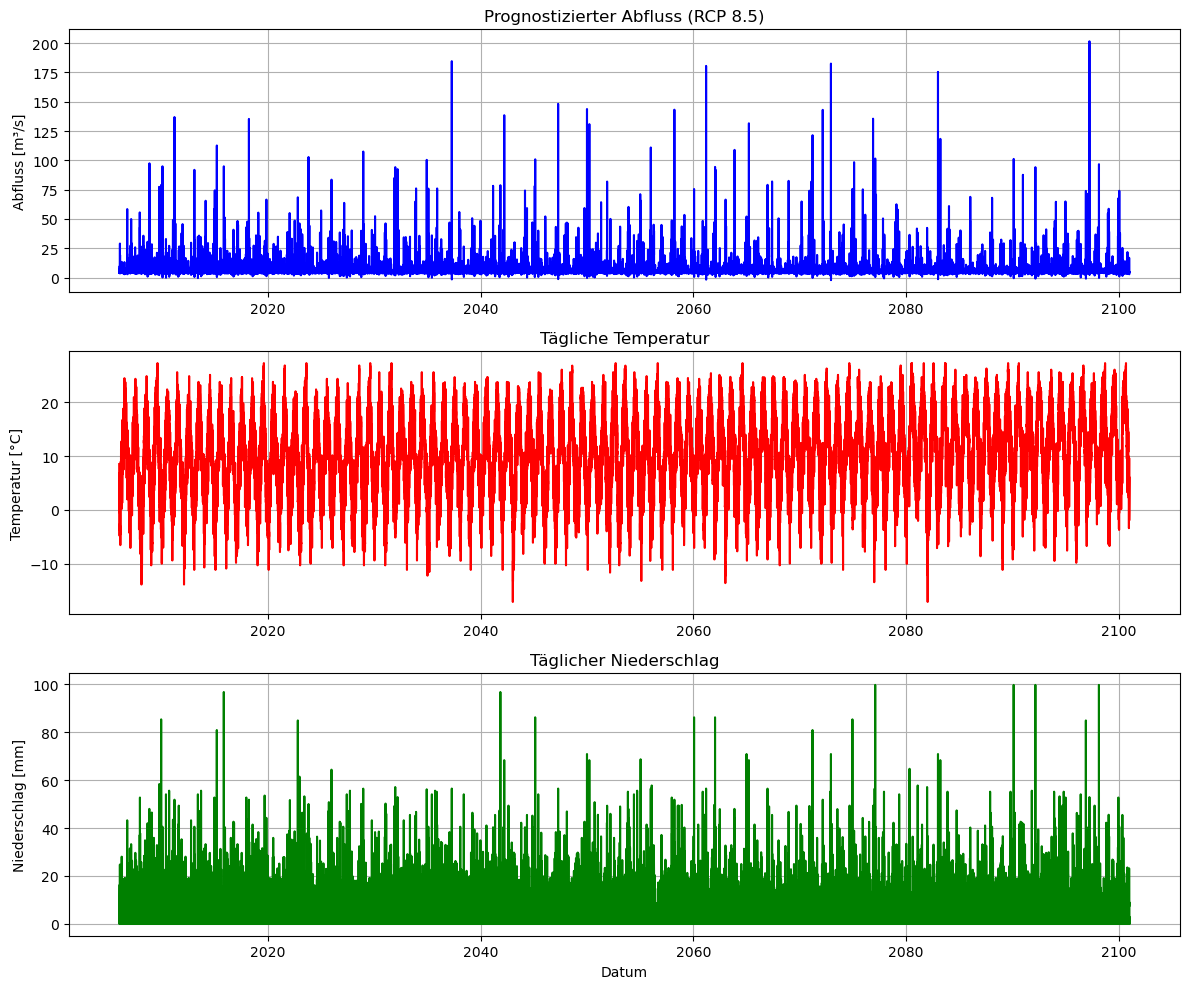

In [5]:
# Datum als Index (optional, für saubere X-Achse)
df_rcp85["date"] = pd.to_datetime(df_rcp26["date"], dayfirst=True)

import pandas as pd
plt.figure(figsize=(12, 10))

# Abfluss
plt.subplot(3, 1, 1)
plt.plot(df_rcp85["date"], df_rcp85["predicted_flow_m3_s"], color="blue")
plt.ylabel("Abfluss [m³/s]")
plt.title("Prognostizierter Abfluss (RCP 8.5)")
plt.grid(True)

# Temperatur
plt.subplot(3, 1, 2)
plt.plot(df_rcp85["date"], df_rcp85["t2m_mean"], color="red")
plt.ylabel("Temperatur [°C]")
plt.title("Tägliche Temperatur")
plt.grid(True)

# Niederschlag
plt.subplot(3, 1, 3)
plt.plot(df_rcp85["date"], df_rcp85["tp_sum"], color="green")
plt.ylabel("Niederschlag [mm]")
plt.title("Täglicher Niederschlag")
plt.xlabel("Datum")
plt.grid(True)

plt.tight_layout()
plt.show()


Aus den Grafiken der RCP-Szenarien lassen sich große Schwankungen im Abfluss erkennen. Unter RCP 8.5 scheint es insgesamt weniger Abfluss zu geben (maximaler Wert um 200 m3/s, viele Werte unter 200 m3/s) als unter RCP 2.6 (maximaler Wert über 400 m3/s, viele Werte über 200 m3/s). Um den Trend besser erkennen zu können werden nachfolgend die Abflussdaten mit LOWESS (Locally Weighted Scatterplott Smooting) geglättet und visualisiert. 

### Glättung visualisieren

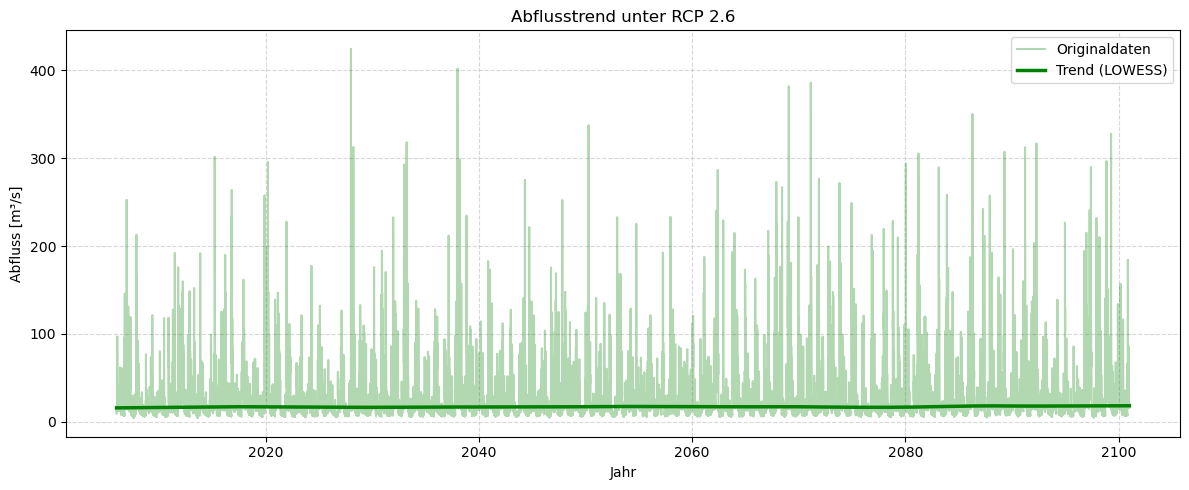

In [3]:
from statsmodels.nonparametric.smoothers_lowess import lowess
from datetime import datetime
import matplotlib.pyplot as plt

#Datum sicherstellen
df_rcp26["date"] = pd.to_datetime(df_rcp26["date"], dayfirst=True)
df_plot_26 = df_rcp26.dropna(subset=["predicted_flow_m3_s"])
x_26 = df_plot_26["date"].map(datetime.toordinal)
y_26 = df_plot_26["predicted_flow_m3_s"]

#Glättung 
lowess_result_26 = lowess(y_26, x_26, frac=0.2)
x_trend_26 = [datetime.fromordinal(int(val)) for val in lowess_result_26[:, 0]]
y_trend_26 = lowess_result_26[:, 1]

#Visualisierung
plt.figure(figsize=(12, 5))
plt.plot(df_rcp26["date"], df_rcp26["predicted_flow_m3_s"], color="green", alpha=0.3, label="Originaldaten")
plt.plot(x_trend_26, y_trend_26, color="green", linewidth=2.5, label="Trend (LOWESS)")
plt.xlabel("Jahr")
plt.ylabel("Abfluss [m³/s]")
plt.title("Abflusstrend unter RCP 2.6")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


Die Visualisierung von Originaldaten und Glättung lässt durch die starken Abflussschwankungen den Trend nicht gut erkennen. Aus diesem Grund wird nachfolgend nur die Glättung visualisiert ohne Originaldaten.

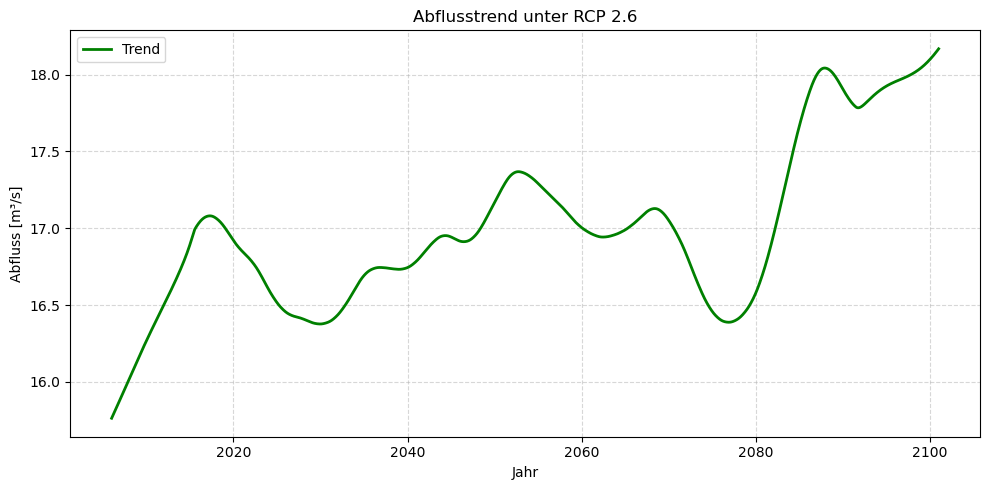

In [4]:
from statsmodels.nonparametric.smoothers_lowess import lowess
from datetime import datetime
import matplotlib.pyplot as plt

# Datum sicherstellen
df_rcp26["date"] = pd.to_datetime(df_rcp26["date"], dayfirst=True)

df_plot_26 = df_rcp26.dropna(subset=["predicted_flow_m3_s"])

# Glättung
x_26 = df_plot_26["date"].map(datetime.toordinal)
y_26 = df_plot_26["predicted_flow_m3_s"]
lowess_result_26 = lowess(y_26, x_26, frac=0.2)
x_trend_26 = [datetime.fromordinal(int(val)) for val in lowess_result_26[:, 0]]
y_trend_26 = lowess_result_26[:, 1]

# Glättung visualisieren
plt.figure(figsize=(10, 5))
plt.plot(x_trend_26, y_trend_26, color="green", linewidth=2, label="Trend")
plt.xlabel("Jahr")
plt.ylabel("Abfluss [m³/s]")
plt.title("Abflusstrend unter RCP 2.6")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


Unter RCP 2.6 nimmt der Abflusstrend bis 2100 insgesamt zu. Es sind Schwankungen zu erkennen, insbesondere ein Anstieg von circa 2030 bis circa 2050 und ein daarauffolgender Abfall bis kurz 2080. Kurz vor 2080 steigt der Abflusstrend nochmal deutlich bis Ende des Jahrhunderts an. Zu Beginn liegt der Abfluss unter 16 m3/s in 2006 und steigt bis 2100 auf mehr als 18 m3/s im geglätteten Trend an.

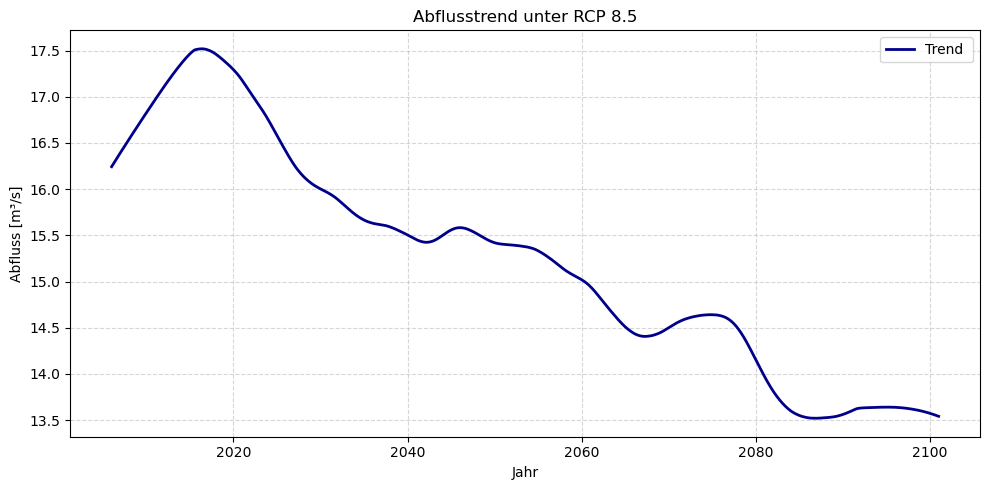

In [5]:
from statsmodels.nonparametric.smoothers_lowess import lowess
from datetime import datetime
import matplotlib.pyplot as plt

#Datum 
df_rcp85["date"] = pd.to_datetime(df_rcp85["date"], dayfirst=True)
df_plot_85 = df_rcp85.dropna(subset=["predicted_flow_m3_s"])

# Glättung
x_85 = df_plot_85["date"].map(datetime.toordinal)
y_85 = df_plot_85["predicted_flow_m3_s"]
lowess_result_85 = lowess(y_85, x_85, frac=0.2)
x_trend_85 = [datetime.fromordinal(int(val)) for val in lowess_result_85[:, 0]]
y_trend_85 = lowess_result_85[:, 1]

# Visualisierung Glättung
plt.figure(figsize=(10, 5))
plt.plot(x_trend_85, y_trend_85, color="darkblue", linewidth=2, label="Trend ")
plt.xlabel("Jahr")
plt.ylabel("Abfluss [m³/s]")
plt.title("Abflusstrend unter RCP 8.5")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


Unter RCP 8.5 nimmt der Abflusstrend bis 2100 insgesamt ab. Es sind kleinere Schwankungen während der Abnahme erkennbar, die den Trend jedoch nicht sonderlich unterbrechen. Der Abflusstrend startet 2006 bei circa 16 m3/s und nimmt im geglätteten Trend bis Ende des Jahrhunderts auf circa 13.5 m3/s ab. Die Glättungen beider RCP-Szenarien werden nachfolgend in einer Abbildung dargestellt, um sie besser vergleichen zu können.

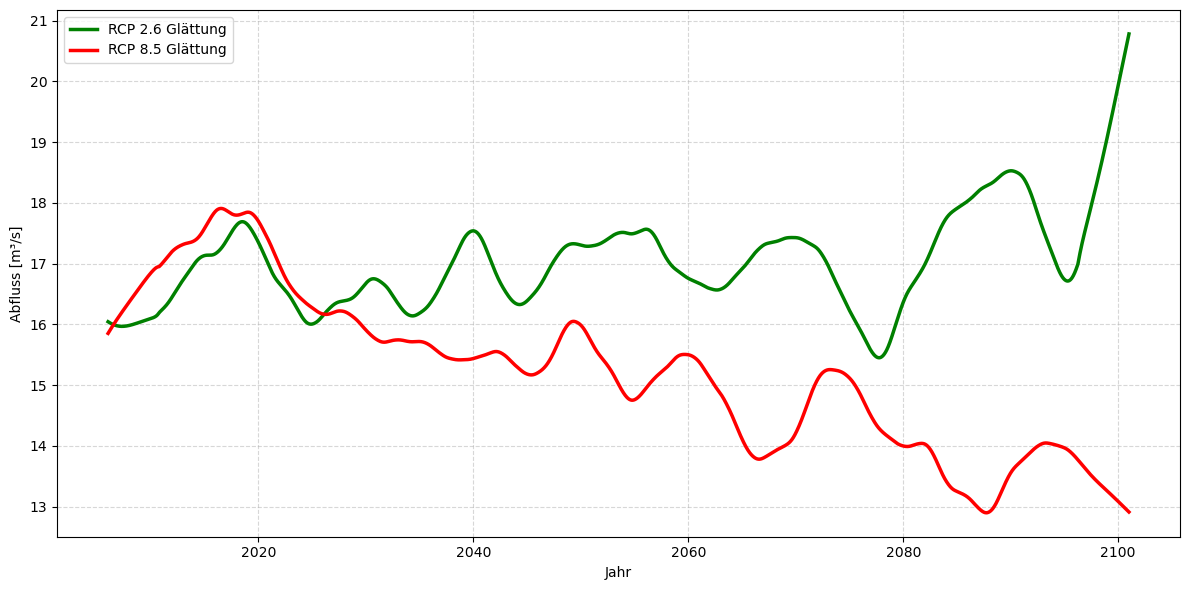

In [6]:
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from datetime import datetime

df_rcp26["date"] = pd.to_datetime(df_rcp26["date"], dayfirst=True)
df_rcp85["date"] = pd.to_datetime(df_rcp85["date"], dayfirst=True)

# Glättung RCP 2.6 
df_26 = df_rcp26.dropna(subset=["predicted_flow_m3_s"])
x_26 = df_26["date"].map(datetime.toordinal)
y_26 = df_26["predicted_flow_m3_s"]
lowess_26 = lowess(y_26, x_26, frac=0.1)
x_26_trend = [datetime.fromordinal(int(val)) for val in lowess_26[:, 0]]
y_26_trend = lowess_26[:, 1]

#Glättung RCP 8.5
df_85 = df_rcp85.dropna(subset=["predicted_flow_m3_s"])
x_85 = df_85["date"].map(datetime.toordinal)
y_85 = df_85["predicted_flow_m3_s"]
lowess_85 = lowess(y_85, x_85, frac=0.1)
x_85_trend = [datetime.fromordinal(int(val)) for val in lowess_85[:, 0]]
y_85_trend = lowess_85[:, 1]

#Visualisierung
plt.figure(figsize=(12, 6))
plt.plot(x_26_trend, y_26_trend, label="RCP 2.6 Glättung", color="green", linewidth=2.5)
plt.plot(x_85_trend, y_85_trend, label="RCP 8.5 Glättung", color="red", linewidth=2.5)

plt.xlabel("Jahr")
plt.ylabel("Abfluss [m³/s]")
#plt.title("Trendlinien des Abflusses unter RCP 2.6 und RCP 8.5")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


Die eben beschriebene Zunahme des Abflusses unter RCP2.6 und die Abnahme unter RCP 8.5 werden durch die gemeinsame Abbildung nochmals verdeutlicht. 

### Tabellen mit statistischen Kennwerten erstellen
Nachfolgend werden Tabellen mit Kennwerten (Mittelwert, Median, Standardabweichung, Min/Max) für die Nahe Zukunft (2021-2050) und ferne Zukunft (2071-2100) beider RCP-Szenarien erstellt, um die Entwicklung des Abflusses nochmals genauer zu untersuchen. Diese werden mit einer 30-Jährigen Referenzperiode verglichen (1991-2020).

In [12]:
df_his["date"] = pd.to_datetime(df_his["date"])

#Funktion zum Berechnen von Kennwerten
def berechne_statistiken_allgemein(df, spalte, label):
    return {
        "Periode": label,
        "Mittelwert": df[spalte].mean(),
        "Median": df[spalte].median(),
        "Standardabweichung": df[spalte].std(),
        "Minimum": df[spalte].min(),
        "Maximum": df[spalte].max(),
        "IQR (Q3 - Q1)": df[spalte].quantile(0.75) - df[spalte].quantile(0.25)
    }

# Periode 0 Referenzperiode
periode_0 = df_his[(df_his["date"] >= "1991-01-01") & (df_his["date"] <= "2020-12-31")]
stats_0 = berechne_statistiken_allgemein(periode_0, "flow_m3_s", "1991–2020")

#Periode 1 und 2 RCP2.6
periode_1 = df_rcp26[(df_rcp26["date"] >= "2021-01-01") & (df_rcp26["date"] <= "2050-12-31")]
periode_2 = df_rcp26[(df_rcp26["date"] >= "2071-01-01") & (df_rcp26["date"] <= "2100-12-31")]

stats_1 = berechne_statistiken_allgemein(periode_1, "predicted_flow_m3_s", "2021–2050 (RCP 2.6)")
stats_2 = berechne_statistiken_allgemein(periode_2, "predicted_flow_m3_s", "2071–2100 (RCP 2.6)")

# Vergleichstabelle RCP2.6
vergleich_df = pd.DataFrame([stats_0, stats_1, stats_2])
print(vergleich_df)


               Periode  Mittelwert     Median  Standardabweichung  Minimum  \
0            1991–2020   14.647287   9.083000           17.944191  1.42800   
1  2021–2050 (RCP 2.6)   24.156064  15.406916           25.925660  4.39691   
2  2071–2100 (RCP 2.6)   26.034200  16.525736           28.884651  4.30014   

      Maximum  IQR (Q3 - Q1)  
0  385.156000      10.904250  
1  424.622162      17.836937  
2  386.063538      19.521890  


### Jetzt muss noch das RCP 8.5 zur Tabelle hinzugefügt werden:

In [14]:
# Periode 1 und 2 RCP 8.5
periode_1_85 = df_rcp85[(df_rcp85["date"] >= "2021-01-01") & (df_rcp85["date"] <= "2050-12-31")]
periode_2_85 = df_rcp85[(df_rcp85["date"] >= "2071-01-01") & (df_rcp85["date"] <= "2100-12-31")]

# Statistiken berechnen für RCP 8.5
stats_1_85 = berechne_statistiken_allgemein(periode_1_85, "predicted_flow_m3_s", "2021–2050 (RCP 8.5)")
stats_2_85 = berechne_statistiken_allgemein(periode_2_85, "predicted_flow_m3_s", "2071–2100 (RCP 8.5)")

# Neue Vergleichstabelle mit beiden Szenarien
vergeich_perioden = pd.DataFrame([stats_0, stats_1, stats_2, stats_1_85, stats_2_85])

print(vergeich_perioden)

               Periode  Mittelwert     Median  Standardabweichung   Minimum  \
0            1991–2020   14.647287   9.083000           17.944191  1.428000   
1  2021–2050 (RCP 2.6)   24.156064  15.406916           25.925660  4.396910   
2  2071–2100 (RCP 2.6)   26.034200  16.525736           28.884651  4.300140   
3  2021–2050 (RCP 8.5)   23.436606  14.976970           25.631700  4.220353   
4  2071–2100 (RCP 8.5)   21.973984  12.034174           25.907340  4.393243   

      Maximum  IQR (Q3 - Q1)  
0  385.156000      10.904250  
1  424.622162      17.836937  
2  386.063538      19.521890  
3  369.123077      17.298891  
4  405.797913      17.249978  


Die Beobachtungen aus den geglätteten Daten lassen sich bestätigen. Für RCP 2.6 nimmt sowohl der Mittelwert als auch der Median des Abflusses von der Nahen Zukunft zur Fernen Zukunft zu. Bei RCP 8.5 ist das gegensätzliche zu beobachten. Mittelwert und Median des Abflusses nehmen von der Nahen Zukunft zur Fernen Zukunft ab. Besonders die Minimalwerte verdeutlichen nochmals, dass das Modell nicht sehr gut sehr niedrige Werte abbildet. Ebenfalls ist erkennbar, dass die Maximalwerte beider Szenarien nicht stark vom Maximalwert der Referenzperiode abweichen. Dies verdeutlicht, dass das Modell sich sehr an den gelernten Extremwerten der Vergangenheit (Trainingsdaten) orientiert.

Wir führen die Abnahme des Abflusses im Trend unter RCP 8.5 auf die stärkere Zunahme von Hitze- und Dürreperioden im Vergleich zu RCP 2.6 zurück (IPCC 2023).

### Abflussverlauf pro Periode visualisiert

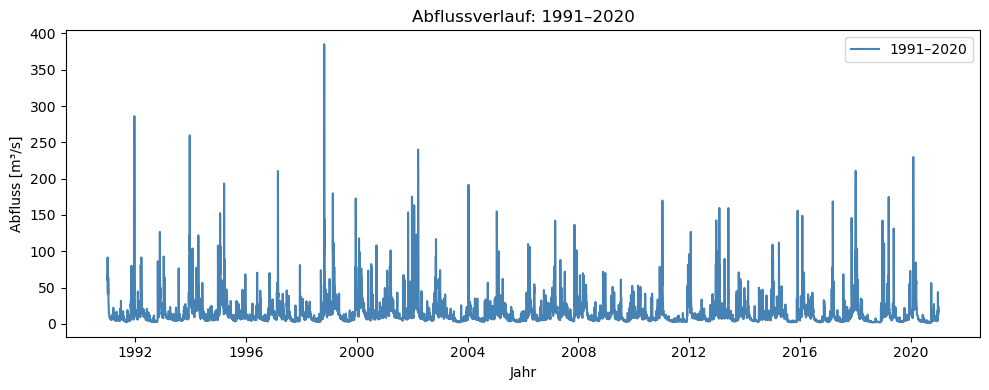

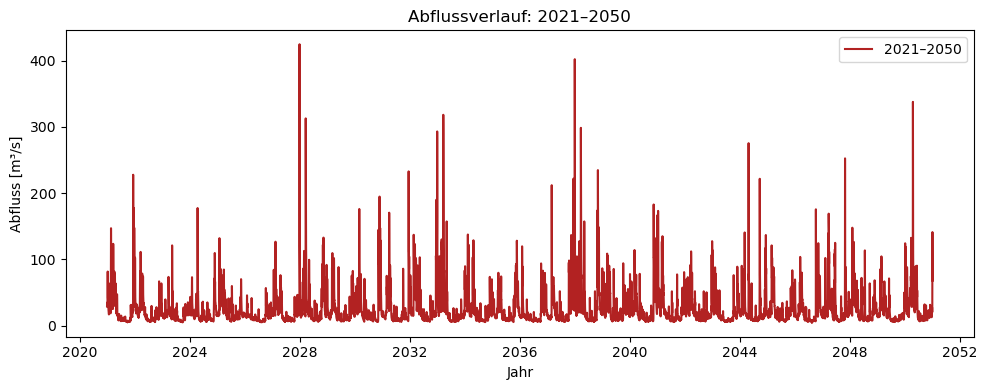

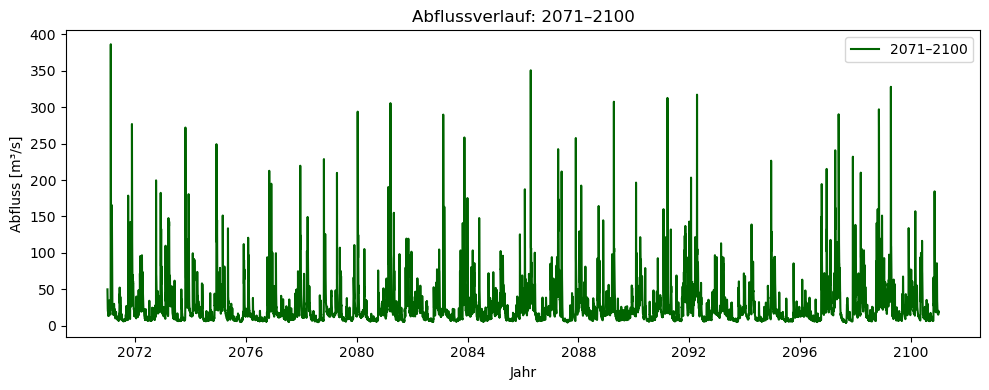

In [8]:

df_his["date"] = pd.to_datetime(df_his["date"], errors="coerce")
df_rcp26["date"] = pd.to_datetime(df_rcp26["date"], errors="coerce")

# Zeitperioden 
periode_0 = df_his[(df_his["date"] >= "1991-01-01") & (df_his["date"] <= "2020-12-31")]
periode_1 = df_rcp26[(df_rcp26["date"] >= "2021-01-01") & (df_rcp26["date"] <= "2050-12-31")]
periode_2 = df_rcp26[(df_rcp26["date"] >= "2071-01-01") & (df_rcp26["date"] <= "2100-12-31")]

# Visualisierung 1991–2020
plt.figure(figsize=(10, 4))
plt.plot(periode_0["date"], periode_0["flow_m3_s"], color="steelblue", label="1991–2020")
plt.xlabel("Jahr")
plt.ylabel("Abfluss [m³/s]")
plt.title("Abflussverlauf: 1991–2020")
plt.legend()
plt.tight_layout()
plt.show()

# Visualisierung 2021–2050
plt.figure(figsize=(10, 4))
plt.plot(periode_1["date"], periode_1["predicted_flow_m3_s"], color="firebrick", label="2021–2050")
plt.xlabel("Jahr")
plt.ylabel("Abfluss [m³/s]")
plt.title("Abflussverlauf: 2021–2050")
plt.legend()
plt.tight_layout()
plt.show()

# Visualisierung 2071–2100
plt.figure(figsize=(10, 4))
plt.plot(periode_2["date"], periode_2["predicted_flow_m3_s"], color="darkgreen", label="2071–2100")
plt.xlabel("Jahr")
plt.ylabel("Abfluss [m³/s]")
plt.title("Abflussverlauf: 2071–2100")
plt.legend()
plt.tight_layout()
plt.show()
